## 1.데이터 불러오기

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### 1-1 그래프에 한글 폰트 적용하기
명령어 실행 후 런타임 다시 시작

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 데이터 출처 : https://github.com/bab2min/corpus/tree/master/sentiment

!wget https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt

--2021-07-23 04:27:09--  https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11631607 (11M) [text/plain]
Saving to: ‘steam.txt.1’

steam.txt.1         100%[===================>]  11.09M  --.-KB/s    in 0.08s   

2021-07-23 04:27:10 (145 MB/s) - ‘steam.txt.1’ saved [11631607/11631607]



In [ ]:
!ls

gdrive	sample_data  steam.txt	steam.txt.1


### column 설정하여 데이터 불러오기

,pn_label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   pn_label  100000 non-null  int64 
 1   reviews   100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


## 2.데이터 파악 및 전처리
label 몇 개 있는지 파악 <br>
unique() 사용

array([0, 1])

### 2-1.중복제거
duplicated(), sort_values() 사용해서 review가 중복인 행 모두 찾아내기

,pn_label,reviews
12810,1,- Total(총평)★★☆ - Direction(연출) ★★ - Sound(음악) ...
7459,0,- Total(총평)★★☆ - Direction(연출) ★★ - Sound(음악) ...
33343,1,ㅈㄴ어렵다
25191,0,ㅈㄴ어렵다
11057,1,갈비지게임
...,...,...
49982,1,환불좀
7232,1,환불좀해주세요
84386,0,환불좀해주세요
39646,0,환불해주세요


drop_duplicated() 사용해서 중복인 행 모두 지우고 ignore_index 적용하기

,pn_label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99887,0,한글화해주면 10개산다
99888,0,개쌉노잼 ㅋㅋ
99889,0,노잼이네요... 30분하고 지웠어요...
99890,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


## 3.토큰화

In [ ]:
# 한국어 토큰화 라이브러리 설치

!pip install konlpy

In [ ]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Okt

In [ ]:
from tqdm import tqdm

단어, 형태소, 서술어 등을 기준으로 토큰화하기

100%|██████████| 99892/99892 [04:57<00:00, 335.78it/s]


['노래',
 '진짜 황숙 어크 공장',
 '막노동 체험판 막노동 사람 장비 내 뭐',
 '차악 차악 차악 정말 왕국 수',
 '시간 도전 과제 수',
 '역시 전작 덱 빌딩',
 '',
 '은근 은근 게임',
 '베 스 이 개 끼 시작 때 체스판 번 더 진짜 무한 로딩 버그 겜 거',
 '스트레스 풀림']

토큰화된 데이터로 새로운 데이터프레임 tokenized_df 만들기

,reviews,pn_label
0,노래,0
1,진짜 황숙 어크 공장,0
2,막노동 체험판 막노동 사람 장비 내 뭐,1
3,차악 차악 차악 정말 왕국 수,1
4,시간 도전 과제 수,1


review에 대한 중복인 행 모두 확인하기

,reviews,pn_label
140,,1
194,,1
203,,0
269,,0
330,노잼,0
...,...,...
99859,,0
99863,매력,1
99882,,1
99888,개 노잼,0


review에 대해서 중복인 행 삭제하기

,reviews,pn_label
0,노래,0
1,진짜 황숙 어크 공장,0
2,막노동 체험판 막노동 사람 장비 내 뭐,1
3,차악 차악 차악 정말 왕국 수,1
4,시간 도전 과제 수,1
...,...,...
91061,한국어 지원 추천,0
91062,엔딩 이해 림보 제목 정말 왜 도대체 게임 명작 전혀,0
91063,한글화 개 산다,0
91064,야생 사랑 사람 위 여운 이야기 영어,1


비어있는 review 제거하기

,reviews,pn_label
6,,1


,reviews,pn_label
0,노래,0
1,진짜 황숙 어크 공장,0
2,막노동 체험판 막노동 사람 장비 내 뭐,1
3,차악 차악 차악 정말 왕국 수,1
4,시간 도전 과제 수,1
...,...,...
91060,한국어 지원 추천,0
91061,엔딩 이해 림보 제목 정말 왜 도대체 게임 명작 전혀,0
91062,한글화 개 산다,0
91063,야생 사랑 사람 위 여운 이야기 영어,1


단어 갯수 분포 그래프 그리기

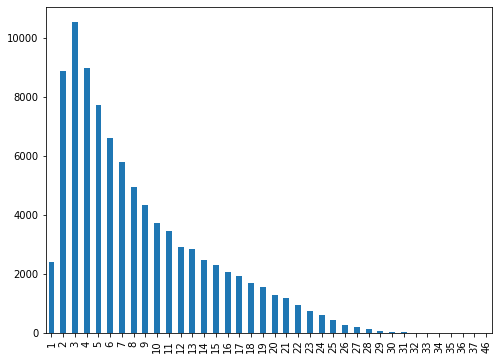

단어 갯수에 대한 평균, 표준편차, 최대최소 값 등 정보 출력하기

count    91065.000000
mean         8.367814
std          5.984802
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         46.000000
Name: reviews, dtype: float64

pn_label의 0(negative), 1(positive)이 갯수가 각 각 몇개 있는지 출력하기

1    45546
0    45519
Name: pn_label, dtype: int64

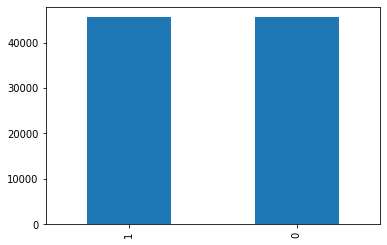

## 4.Word to index

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

인덱싱 할 최대 단어 갯수(MAX_NUM_WORD)를 정하고 문장 길이(MAX_WORD_LENGTH) 정하기

In [ ]:
MAX_NUM_WORD = 
MAX_WORD_LENGTH = 

단어에 인덱스 설정하기

모델에 입력할 데이터(X) 만들기

array([[ 384,    0,    0, ...,    0,    0,    0],
       [  19,  961,    0, ...,    0,    0,    0],
       [   9,  816,   20, ...,    0,    0,    0],
       ...,
       [  82,   15,  957, ...,    0,    0,    0],
       [ 626,    9,  190, ...,    0,    0,    0],
       [ 185,   19, 1348, ...,    0,    0,    0]], dtype=int32)

(91065, 30)

모델에 입력할 데이터(y) 만들기

array([0, 0, 1, ..., 0, 1, 1])

(91065,)

train, test 데이터로 분리

(81958, 30) (81958,)
(9107, 30) (9107,)


## 5.모델링 (RNN, LSTM, GRU 등 등)

모델 구성에 필요한 라이브러리 import 하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

모델 구성하고 훈련시키기

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 30, 8)             16000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 21,281
Trainable params: 21,281
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
4611/4611 [==============================] - 23s 5ms/step - loss: 0.5074 - accuracy: 0.7446 - val_loss: 0.5461 - val_accuracy: 0.7228
Epoch 2/10
4611/4611 [==============================] - 23s 5ms/step - loss: 0.5047 - accuracy: 0.7468 - val_loss: 0.5556 - val_accuracy: 0.7228
Epoch 3/10
4611/4611 [==============================] - 22s 5ms/step - loss: 0.5008 - accuracy: 0.7489 - val_loss: 0.5544 - val_accuracy: 0.7194
Epoch 4/10
4611/4611 [==============================] - 22s 5ms/step - loss: 0.4975 - accuracy: 0.7516 - val_loss: 0.5584 - val_accuracy: 0.7163


test 데이터로 모델 평가하기

285/285 [==============================] - 1s 3ms/step - loss: 0.5558 - accuracy: 0.7165


[0.5558155179023743, 0.7164818048477173]

loss, val_loss 시각화

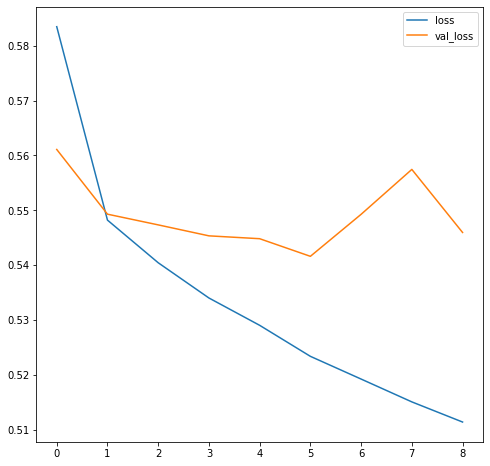

accuracy, val_accuracy 시각화

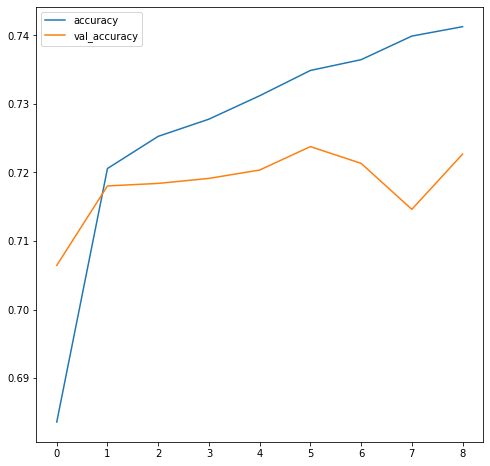

모델(RNN, LSTM, GRU 등)을 바꿔보거나, paramter를 수정해보며 성능이 잘 나온 모델 저장하기

In [ ]:
# path = '/content/gdrive/MyDrive/Ulsan_univ/model/'

# model.save(path+'LSTM_noun_batch16_epoch10.h5')